In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [11]:
df = pd.read_csv("../data/adult.csv", index_col=0)
df = df.replace("?", np.nan).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   marital-status  30162 non-null  object
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   hours-per-week  30162 non-null  int64 
 9   native-country  30162 non-null  object
 10  salary          30162 non-null  object
 11  salary K$       30162 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


# Task 1
Print the count of men and women in the dataset.

In [12]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [24]:
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [21]:
df[df["native-country"] == "Poland"].shape[0] / df.shape[0] * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [30]:
high_s = df[df["salary"] == ">50K"]
low_s = df[df["salary"] == "<=50K"]
high_s["age"].mean()
high_s["age"].std()
low_s["age"].mean()
low_s["age"].std()
pd.Series([
    high_s["age"].mean(),
    high_s["age"].std(),
    low_s["age"].mean(),
    low_s["age"].std()
], index=[
    "salary_more_age_mean", "salary_more_age_std", "salary_less_age_mean", "salary_less_age_std"
])

salary_more_age_mean    43.959110
salary_more_age_std     10.269633
salary_less_age_mean    36.608060
salary_less_age_std     13.464631
dtype: float64

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [36]:
df[(~df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])) & (df["salary"] == ">50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [41]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [45]:
def categorize_marital_status(status):
    if status.startswith("Married"):
        return "Married"
    else:
        return "Non-Married"

df["marital_status_type"] = df["marital-status"].apply(categorize_marital_status)
df.groupby(["marital_status_type", "salary"]).size()

marital_status_type  salary
Married              <=50K      8016
                     >50K       6440
Non-Married          <=50K     14638
                     >50K       1068
dtype: int64

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [50]:
max_hours = df["hours-per-week"].max()
pd.Series([max_hours, df[df["hours-per-week"] == max_hours].shape[0]], index=[
    "Max Hours Per Week", "Number of People"
])

Max Hours Per Week    99
Number of People      78
dtype: int64

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

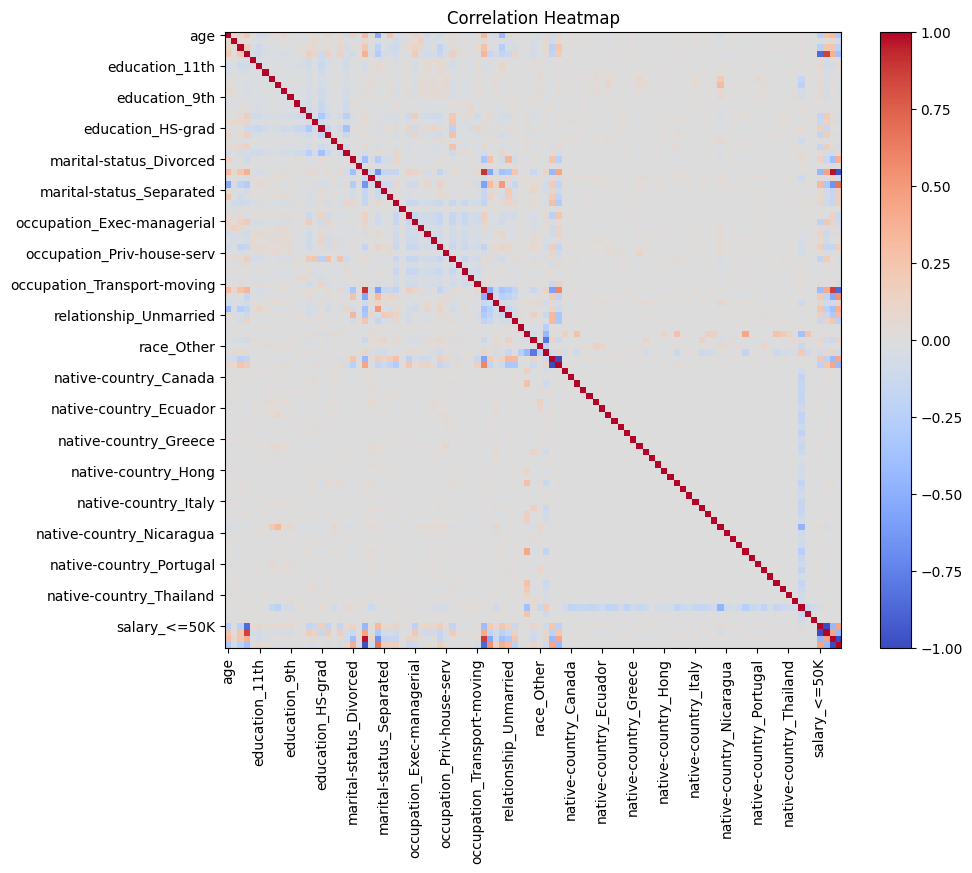

In [64]:
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(0, len(correlation_matrix.columns), 5), correlation_matrix.columns[::5], rotation=90)
plt.yticks(range(0, len(correlation_matrix.columns), 5), correlation_matrix.columns[::5])
plt.show()